# PCA and LDA

Today, we are looking at some breast cancer data. We try to classify it.
The primary application of this dataset is binary classification, where machine learning models are trained to predict whether a breast tumor is malignant (cancerous) or benign (non-cancerous) based on features extracted from digitized images of fine needle aspirate (FNA) samples.

## Import important packages


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# all the machine learning stuff
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data_handler = load_breast_cancer()
df = pd.DataFrame(data_handler.data, columns=data_handler.feature_names)
# df['target'] = data.target

To get a feeling for the dataset, let's print the first five rows:

In [3]:
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

It is a good practice to work with pandas DataFrames. They behave very similar to numpy array. To avoid confusion for beginners, we continue with a numpy array.

In [4]:
data = df.values
print(data.shape)

(569, 30)


The array has 569 samples with 30 features. It's good to keep this in mind to avoid errors later on.

## Data preprocessing
Recall: We need, that the every instance is mean free and has variance 1.  
EXERCISE: Check both conditions.

In [ ]:
scaler = StandardScaler()  # create object
normalized_df = scaler.fit_transform(
    data
)  # calculate new values (fit) and apply it (transform)

# print(np.mean(data, axis=0))
# print(np.var(data, axis=0))
# type(scaler)

sklearn.preprocessing._data.StandardScaler

## PCA
Let's do the PCA:

In [14]:
pca = PCA(n_components=10)  # create object
data_pca = pca.fit_transform(
    normalized_df
)  # calculate new values (fit) and apply it (transform)

EXERCISE: Check, whether you took the right axis and the explained_variance_ration_ .
Make sure to have at least 80% in your data set.

Explained variance ratio for each of the 10 components:
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
Cumulative explained variance:
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881]
Total explained variance with 10 components: 95.16%
We have captured at least 80% of the variance in the dataset.


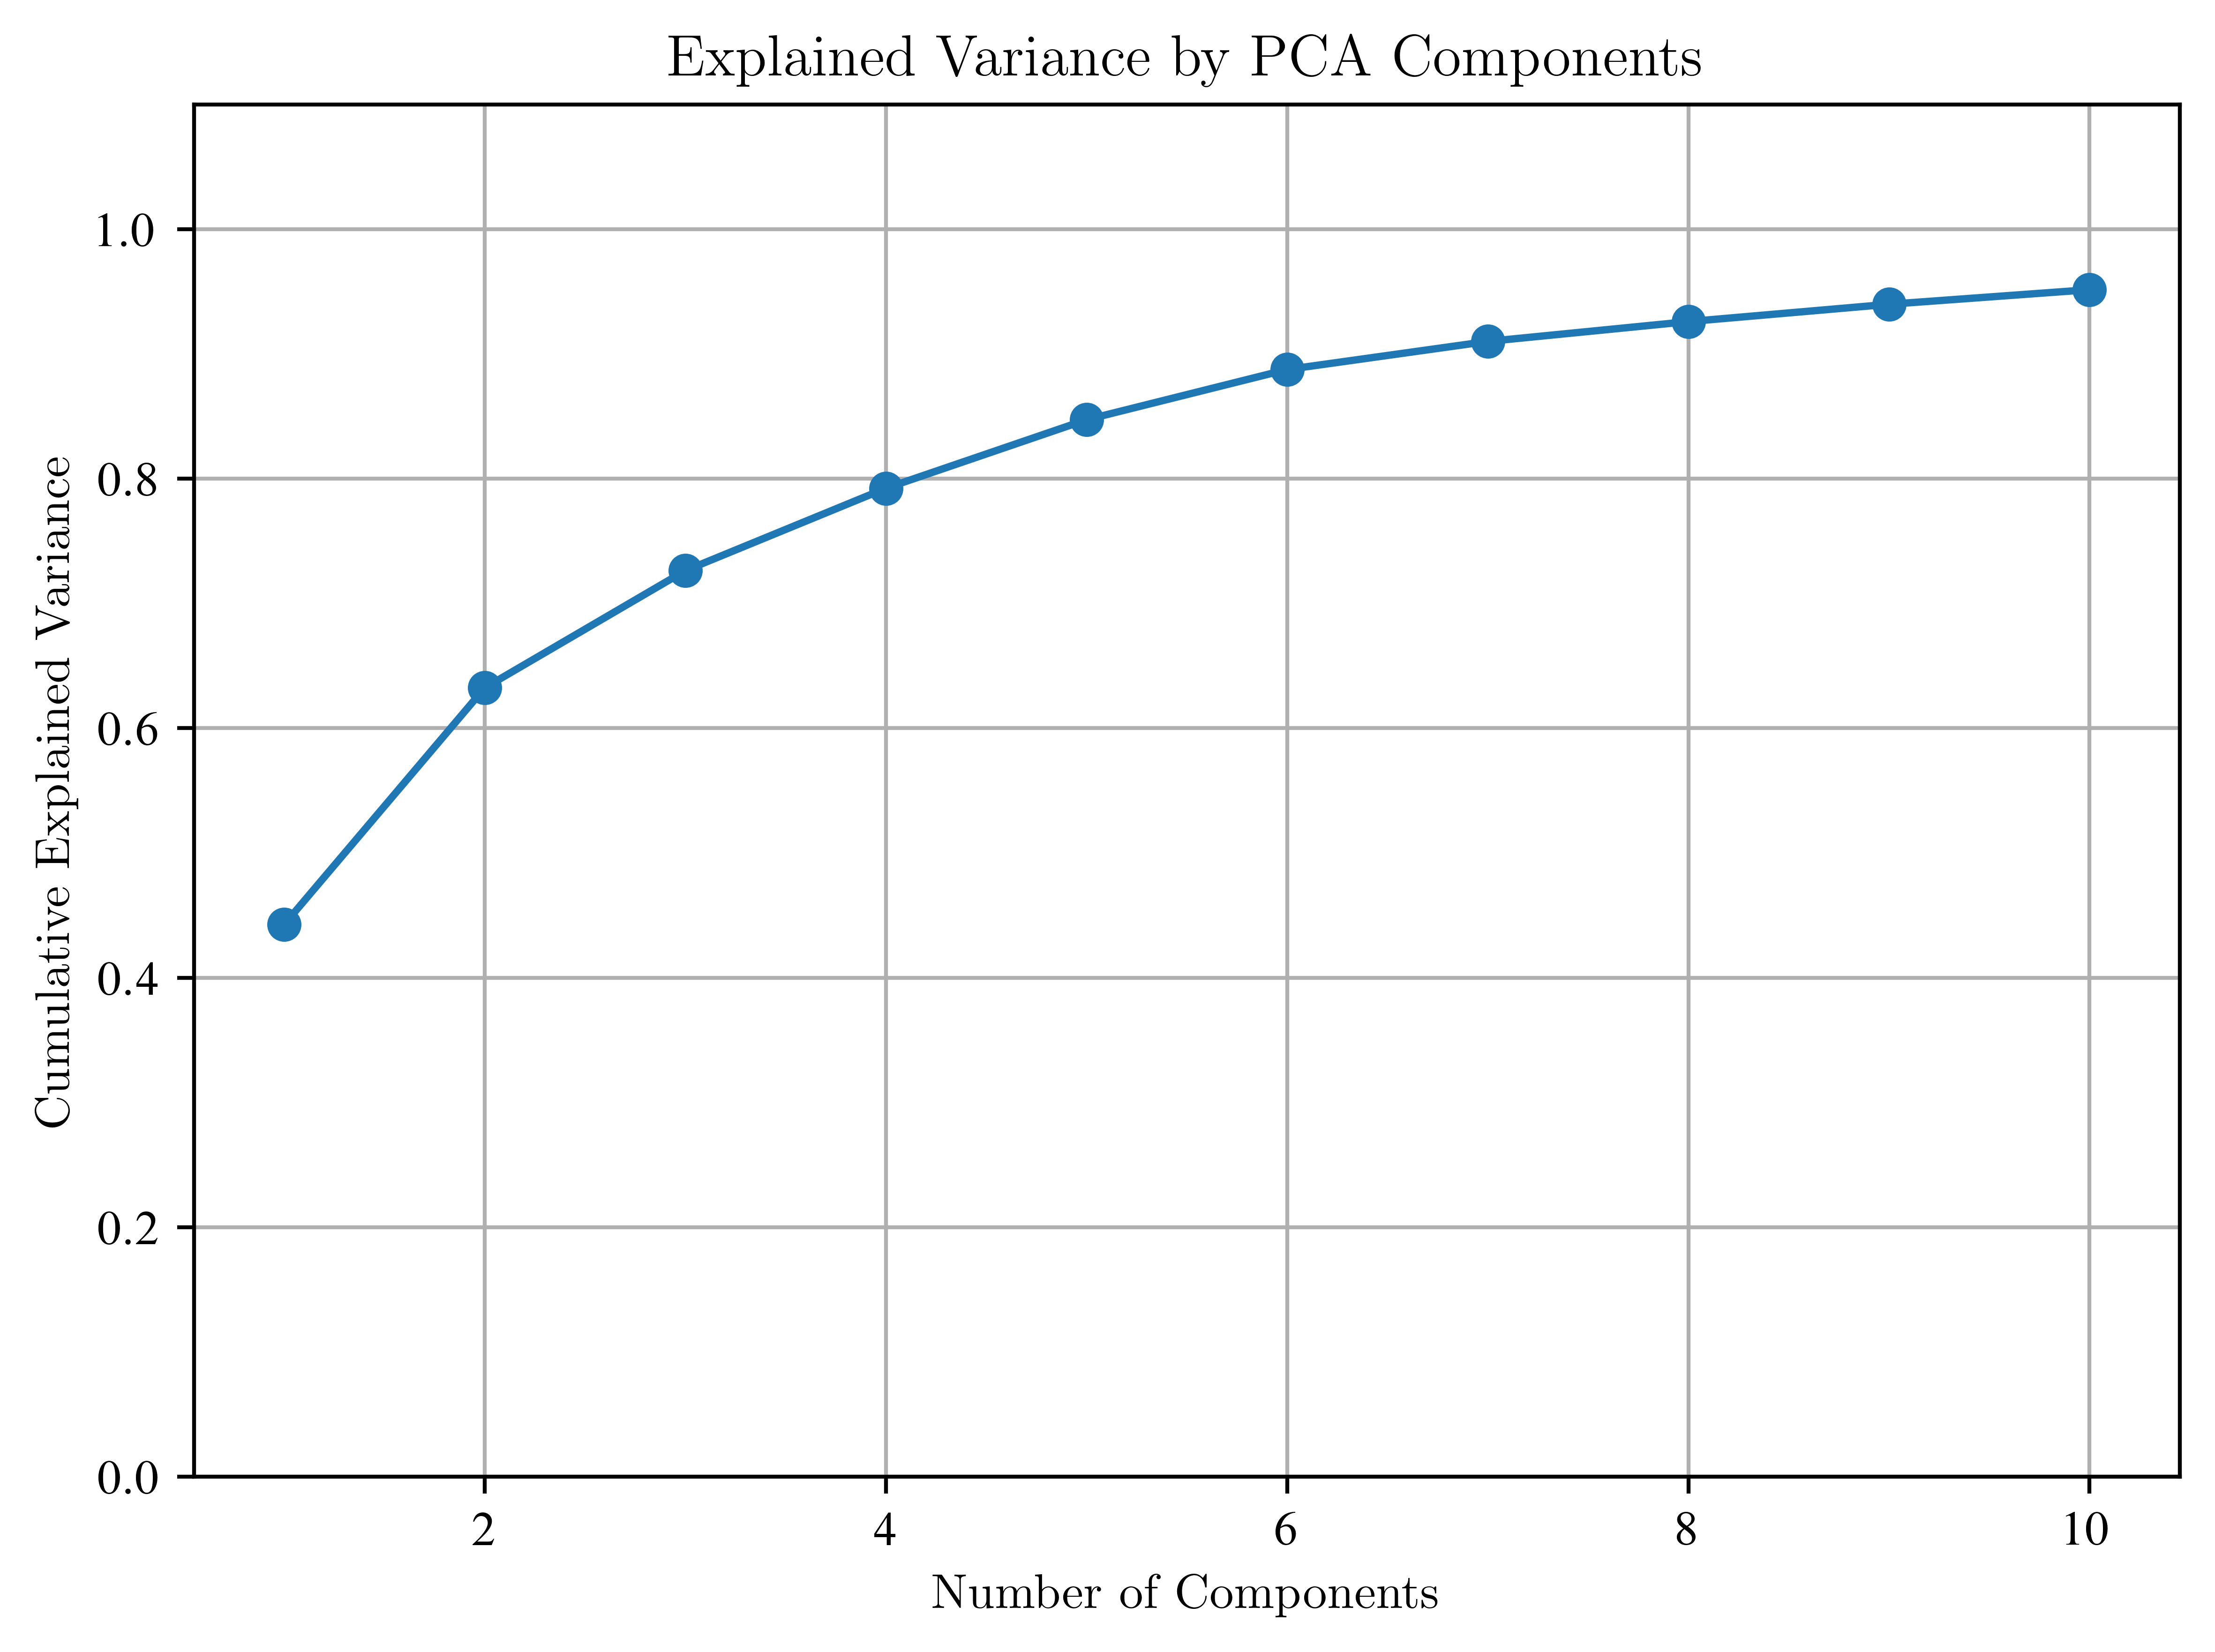

In [15]:
# 1. Check the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio for each of the 10 components:")
print(explained_variance)

# The values are sorted in descending order, which means we are taking the 'right axes'
# (i.e., the principal components that explain the most variance).

# 2. Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:")
print(cumulative_explained_variance)

# 3. Check if we have at least 80% of the variance explained
total_explained_variance = cumulative_explained_variance[-1]
print(f"Total explained variance with 10 components: {total_explained_variance:.2%}")

if total_explained_variance >= 0.8:
    print("We have captured at least 80% of the variance in the dataset.")
else:
    print(
        "We have not captured at least 80% of the variance. Consider increasing n_components."
    )

# We can also plot this to visualize it
plt.figure()
plt.plot(np.arange(1, 11), cumulative_explained_variance, marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

Let's take a look at the components.

In [16]:
def plot_pca(scores, label_components=np.array([]), n_first=3):
    """
    plots n_first components against each other and saves the plots
    Arguments:
    scores: pca transformed data
    label_components: these information is written to the axis labels
        example: pca.explained_variance_ratio_
    n_first: number of components wich should be plot against each other
            (number of plots= n_first*(n_first-1)/2 )
    """
    if label_components.shape[0] == 0:
        label_components = np.arange(n_first) + 1
    else:
        label_components = np.round(label_components, 2)
    if n_first > label_components.shape[0]:
        n_first = label_components.shape[0]
    for i in range(n_first):
        for j in range(i + 1, n_first):
            plt.figure()
            plt.scatter(scores[:, i], scores[:, j])
            plt.xlabel("PC" + str(i) + " " + str(label_components[i]))
            plt.ylabel("PC" + str(j) + " " + str(label_components[j]))
            plt.title("PC" + str(i) + " vs PC" + str(j))
    plt.show()

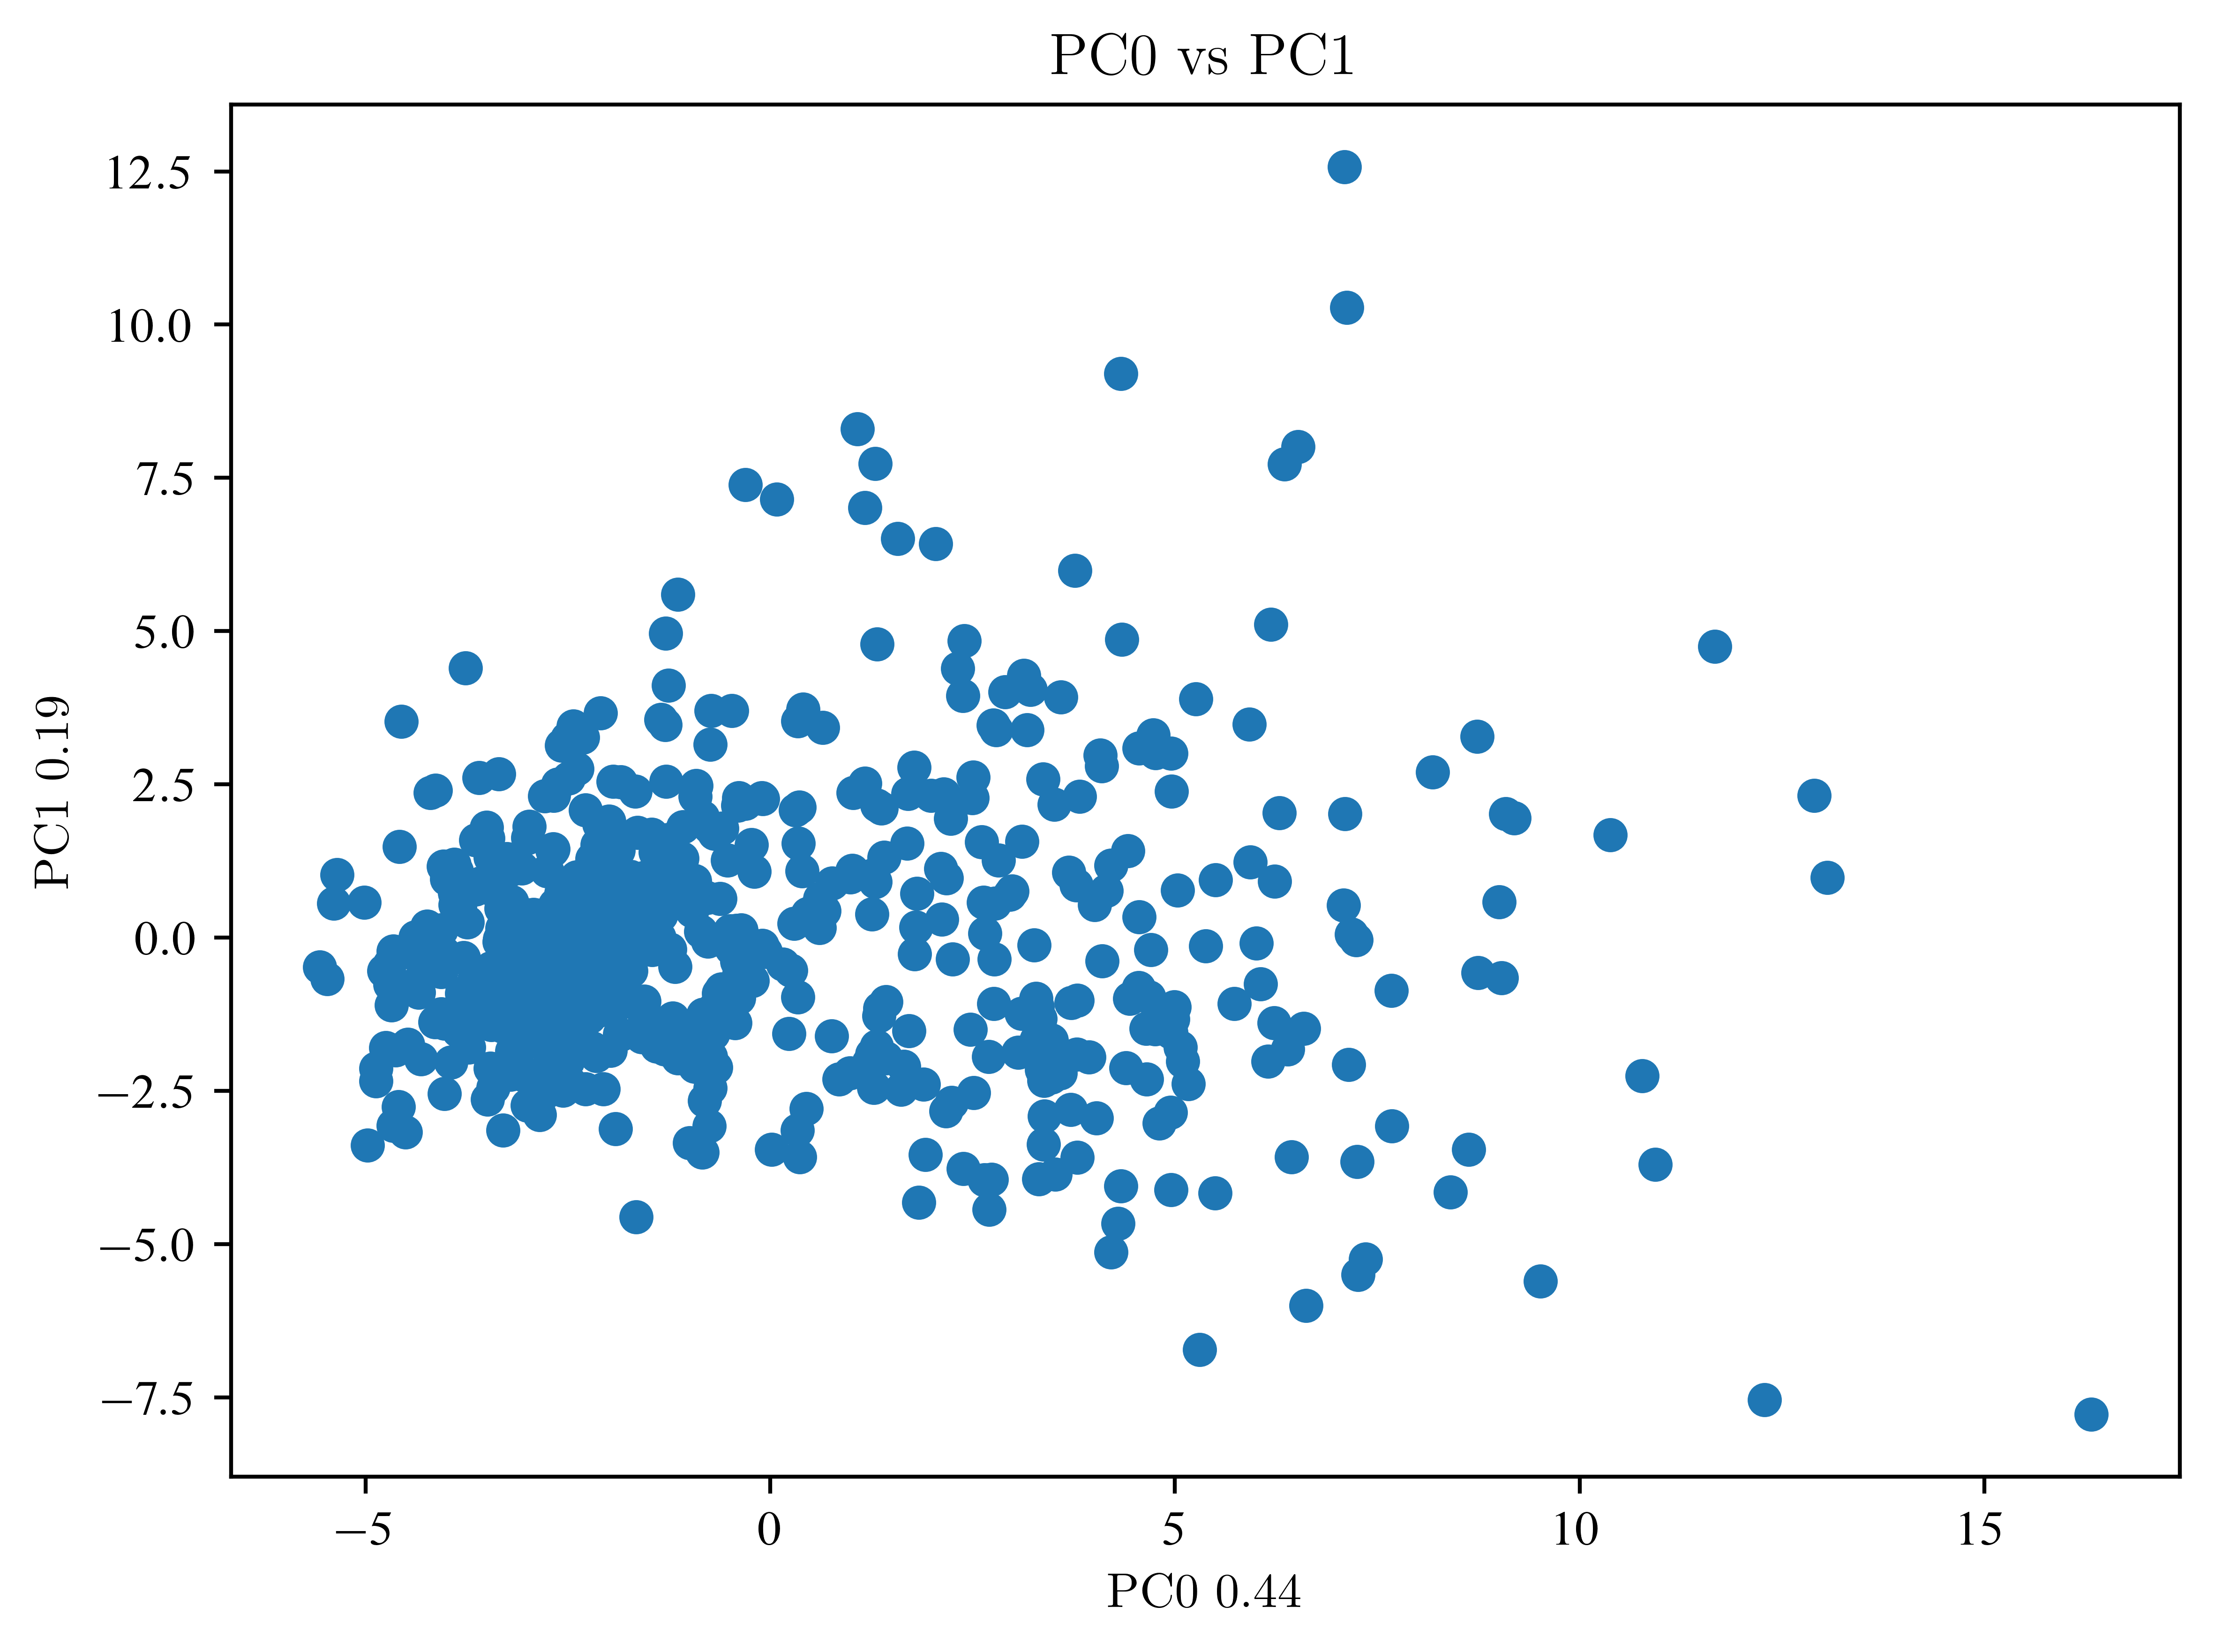

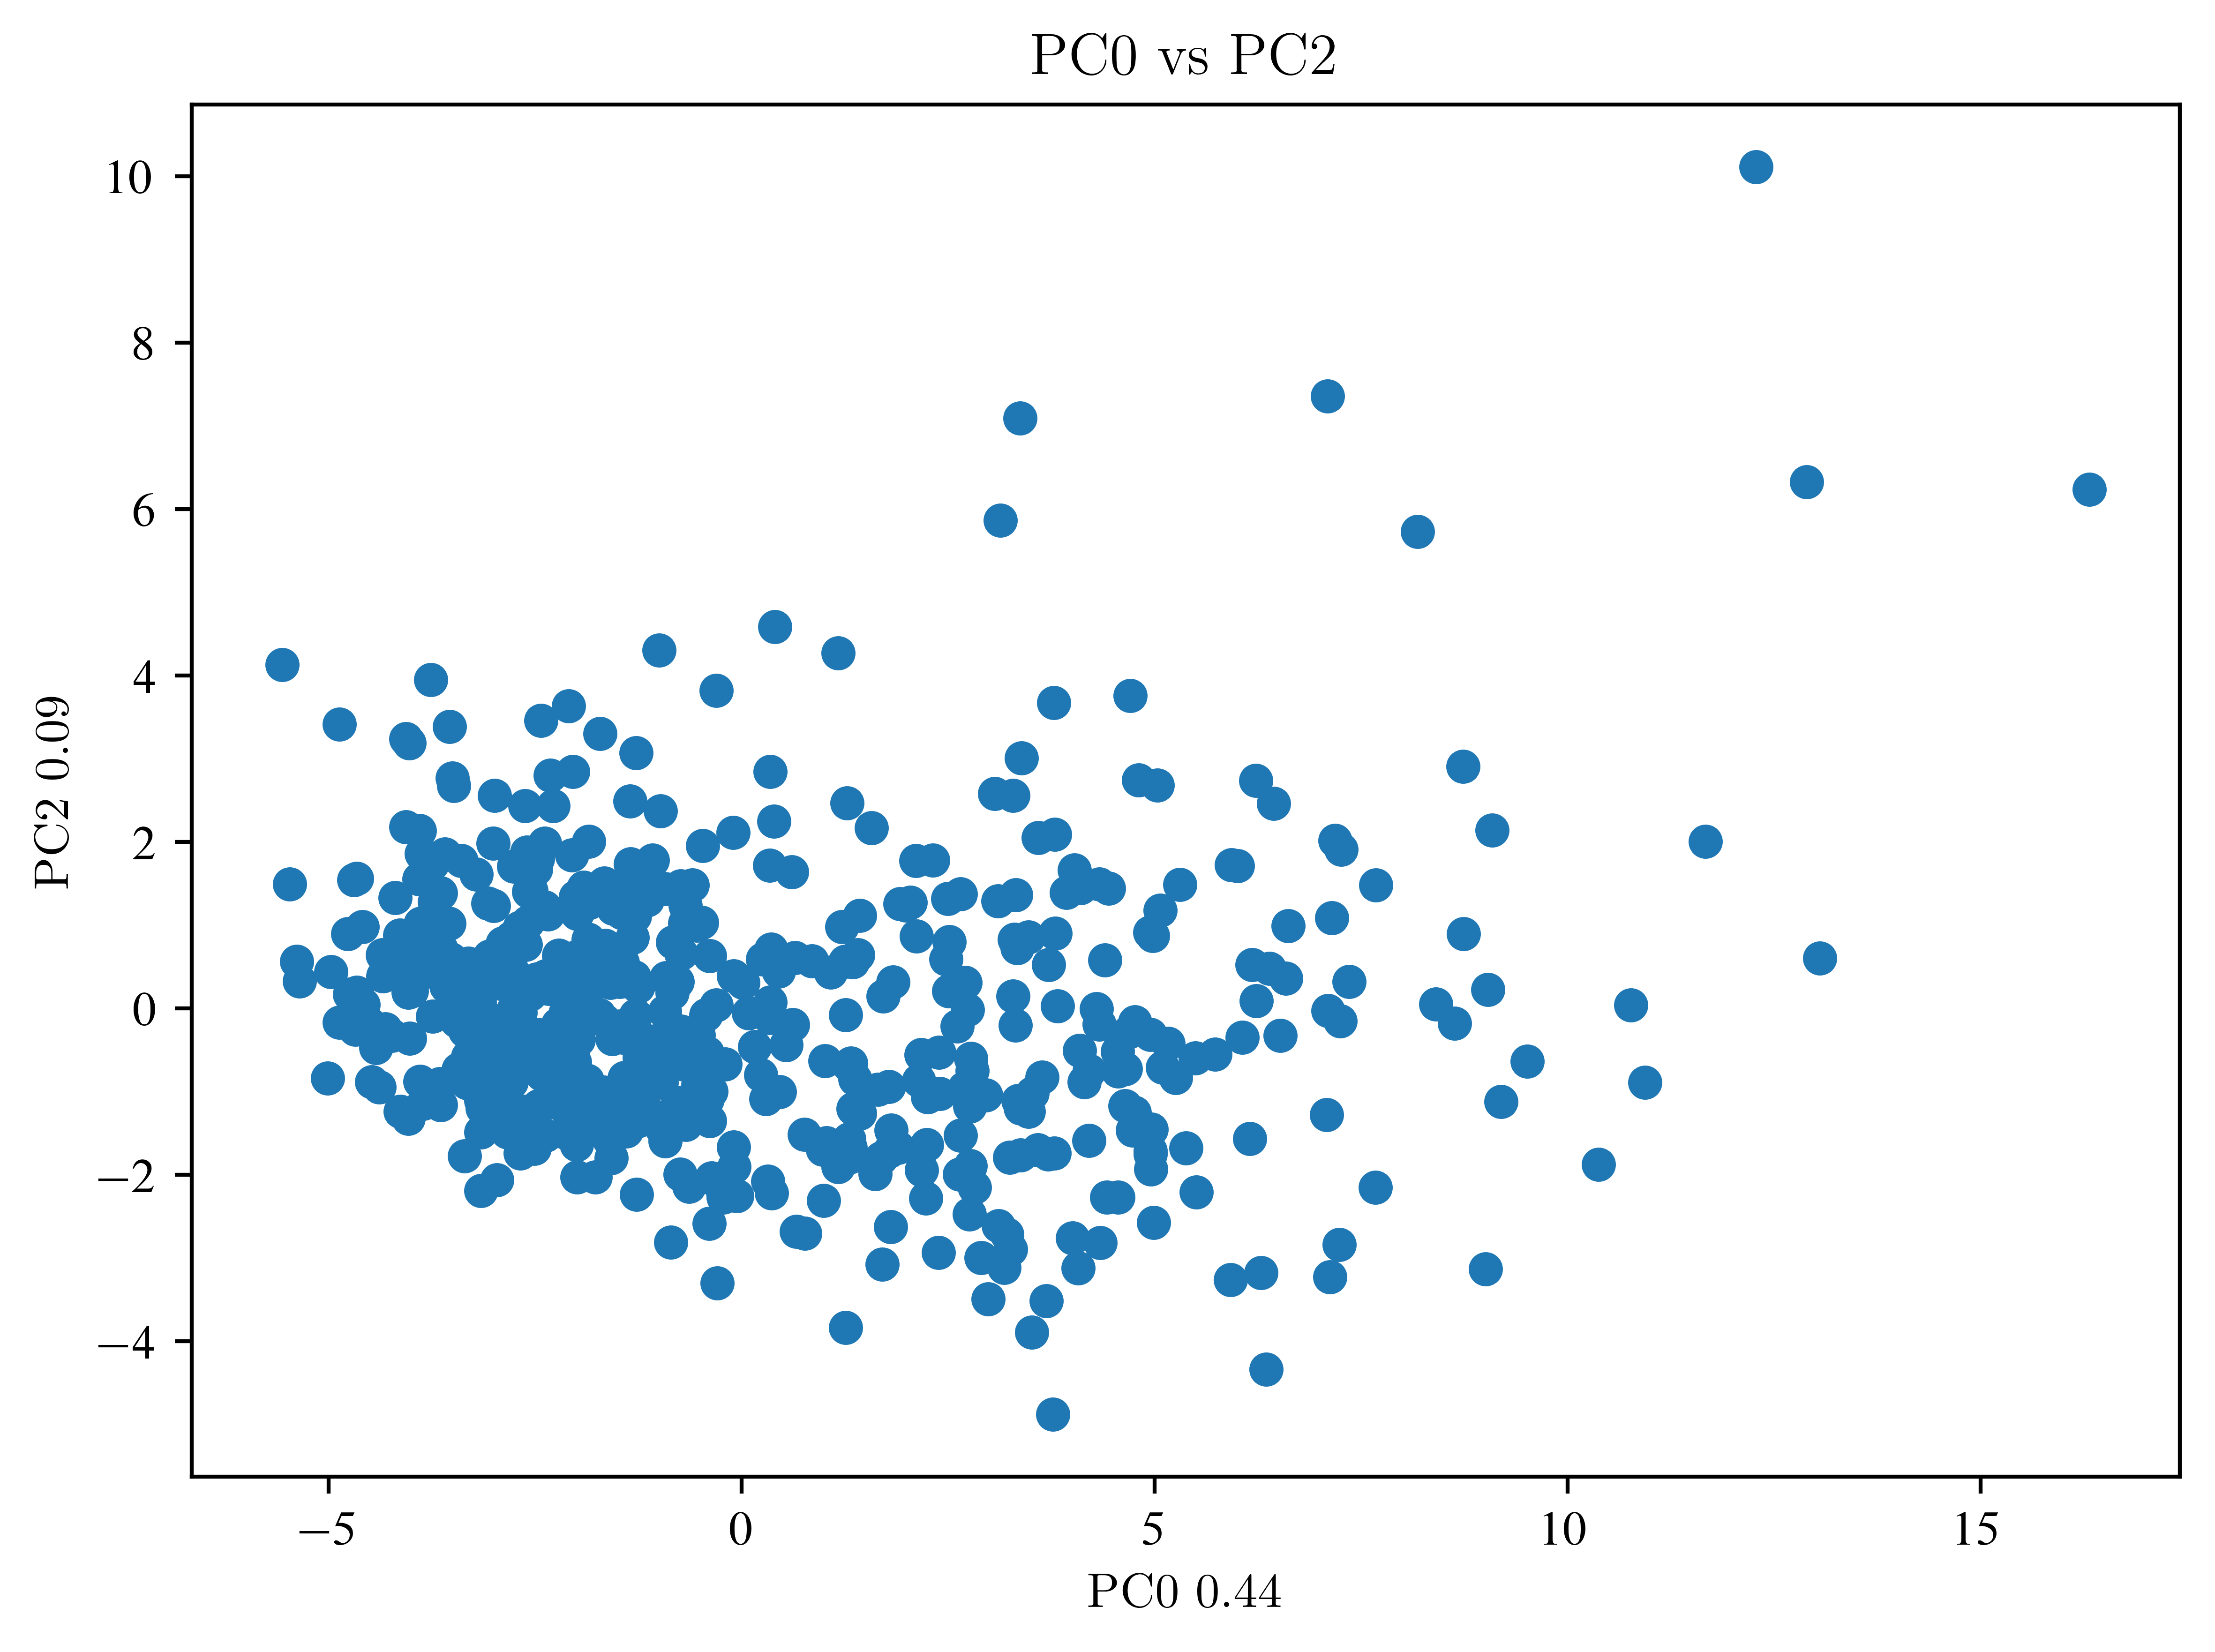

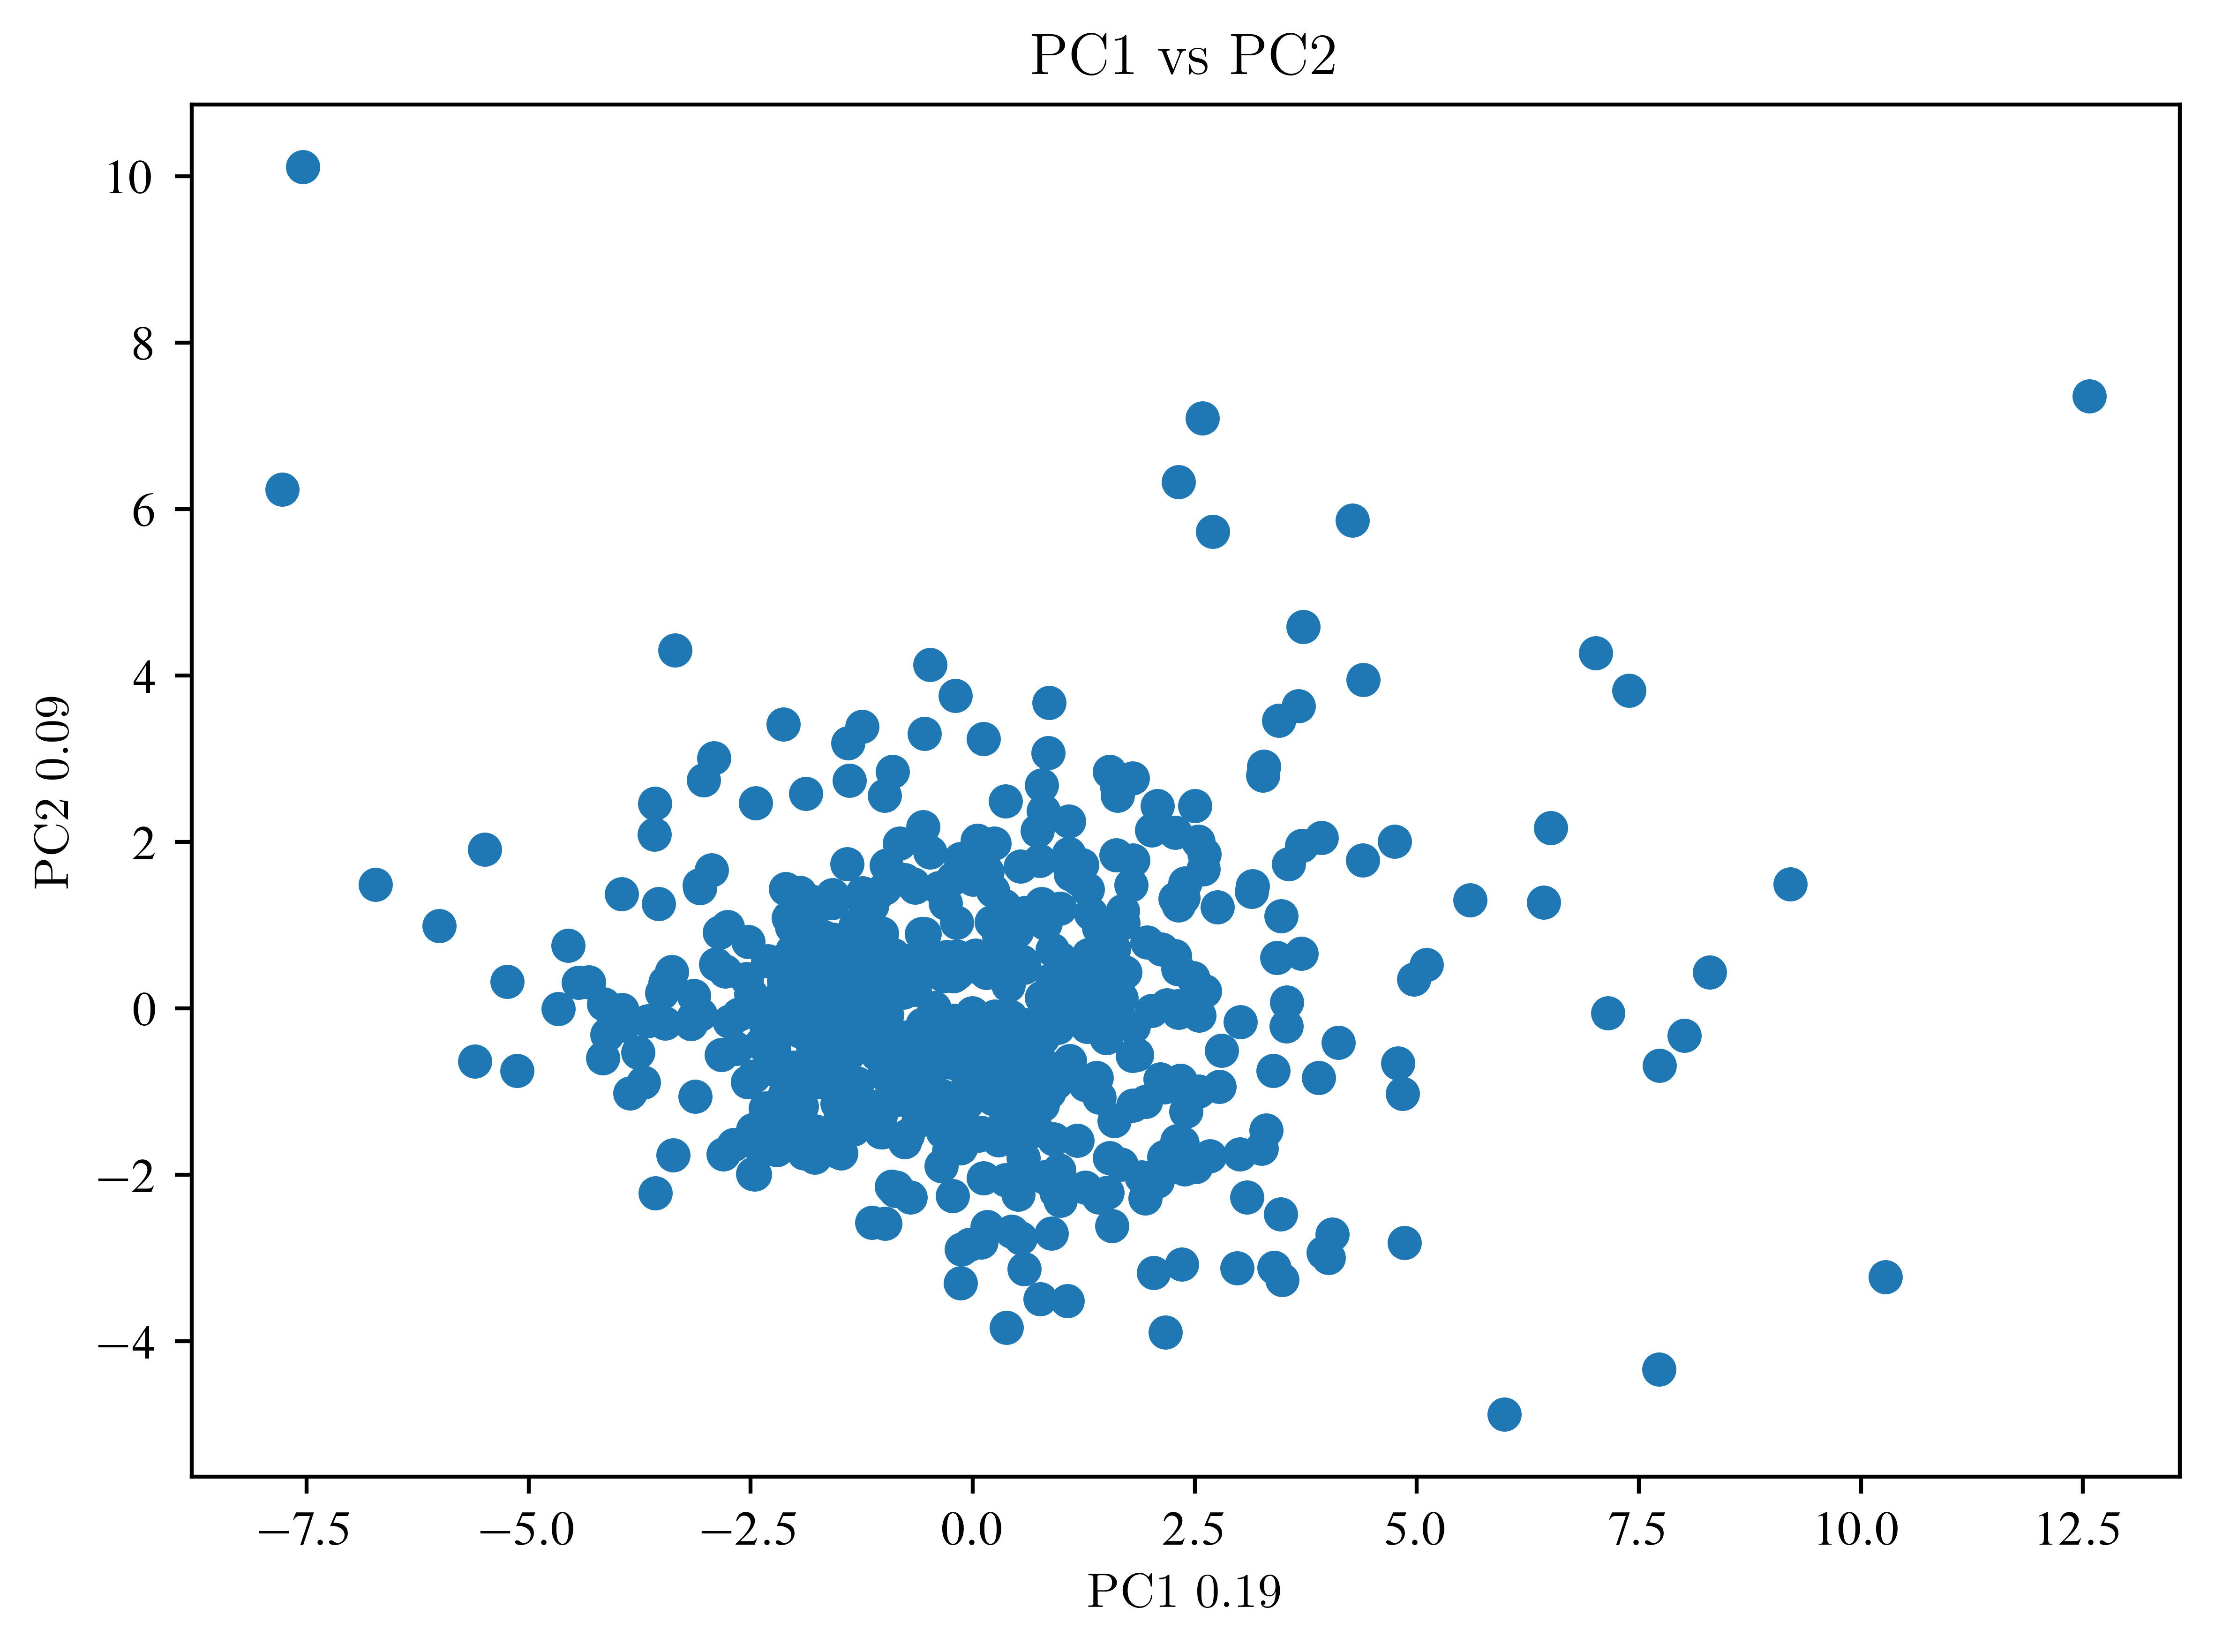

In [17]:
plot_pca(data_pca, label_components=pca.explained_variance_ratio_, n_first=3)

So far, not much can be seen. Then an LDA is necessary.

## LDA

Recall, the classification labels are stored in

In [18]:
print(data_handler["target"][0:23])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]


Because we are doing a classification, we subdivide our dataset into a training and a test dataset. (Usually, you do this BEFORE the PCA)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    data_pca, data_handler["target"], test_size=0.5, random_state=42
)

(284,)


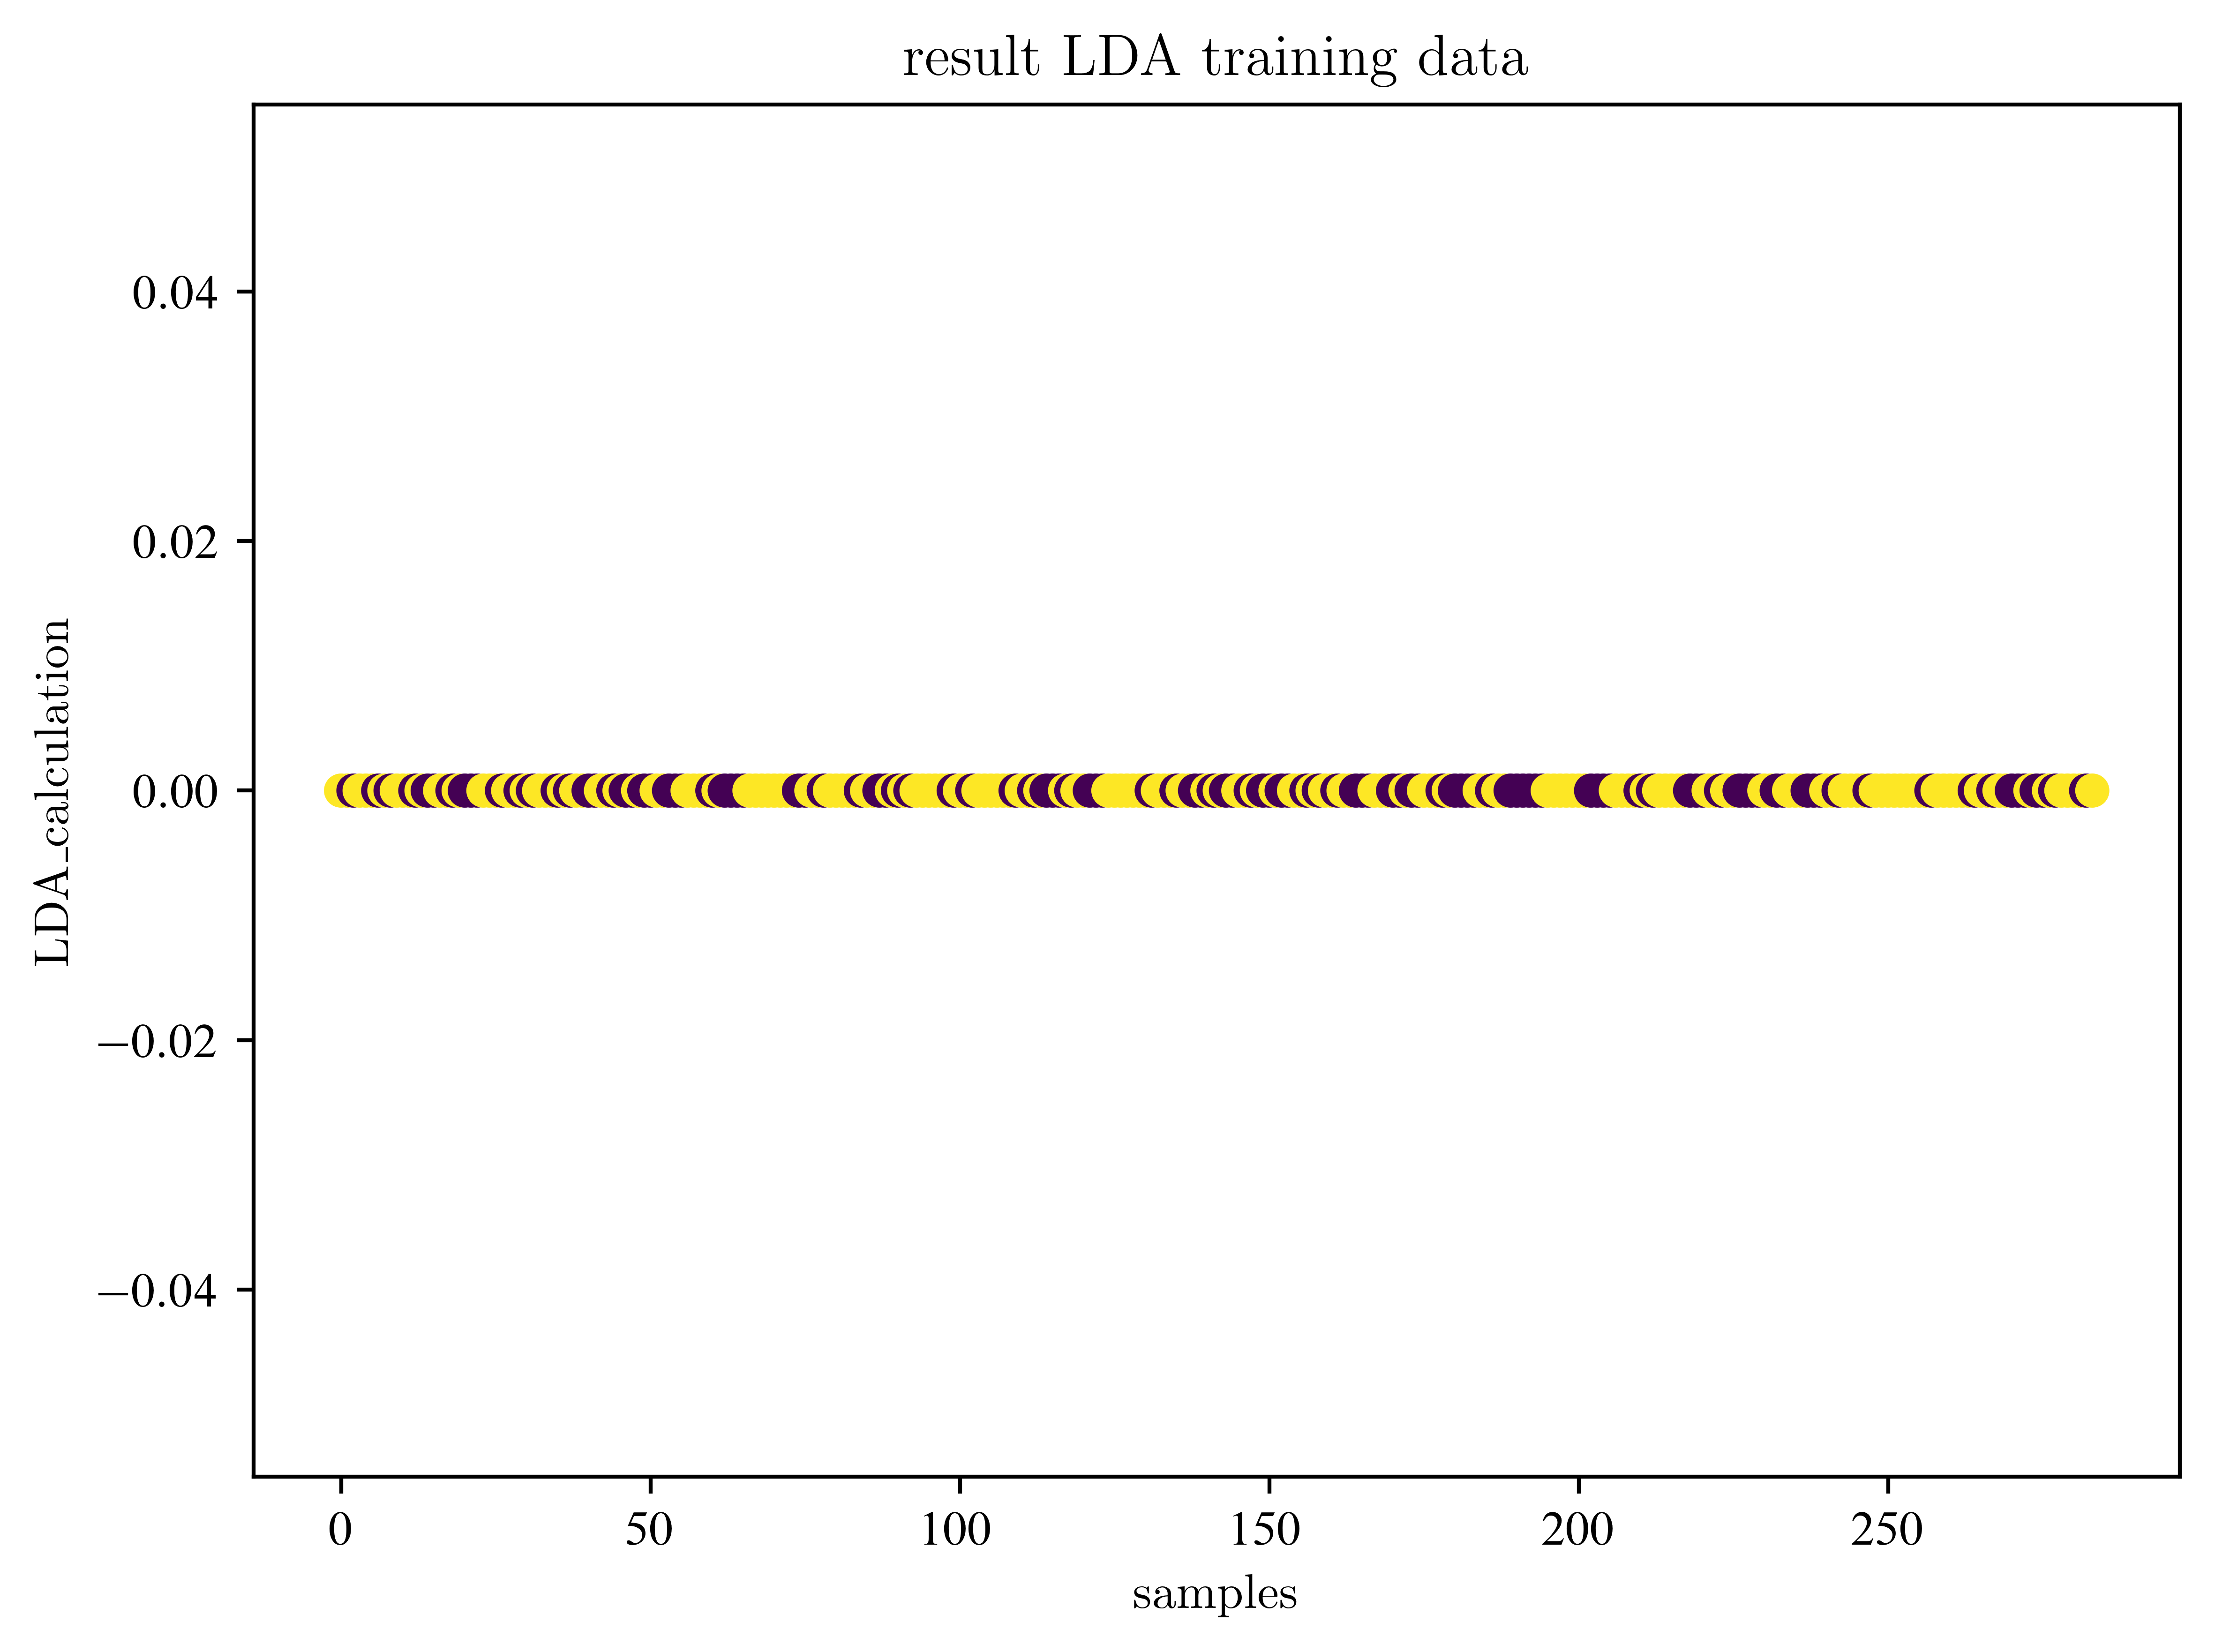

In [20]:
data_lda = np.zeros(y_train.shape[0])

# How many components do we need?
lda = LinearDiscriminantAnalysis(n_components=1)  # create object
# calculate new values (fit) and apply it (transform)
# HERE is a line missing
print(data_lda.shape)
samples = np.arange(data_lda.shape[0])
plt.scatter(samples, data_lda, c=y_train)
plt.title("result LDA training data")
plt.xlabel("samples")
plt.ylabel("LDA_calculation")
plt.show()

EXERCISE: Where is the decision boundary? Give an inequality as answer.

EXERCISE: Explain the last plot. What is the difference between the transformed data and the prediction?

### Apply to test data

In [21]:
try:
    accuracy = lda.score(X_test, y_test)
    print("Accuracy:", accuracy)

    # here only transorm the test data
    lda_test_data = lda.transform(X_test)
    samples = np.arange(lda_test_data.shape[0])
    plt.scatter(samples, lda_test_data, c=y_test)
    plt.hlines(bdry, 0, lda_test_data.shape[0])
    plt.title("result LDA training data")
    plt.xlabel("samples")
    plt.ylabel("LDA_calculation")
    plt.show()
except:
    print("Something before went wrong")

Something before went wrong


EXERCISE: How do the results change, when we change the number of PCA components? Find a good measure to check this. 

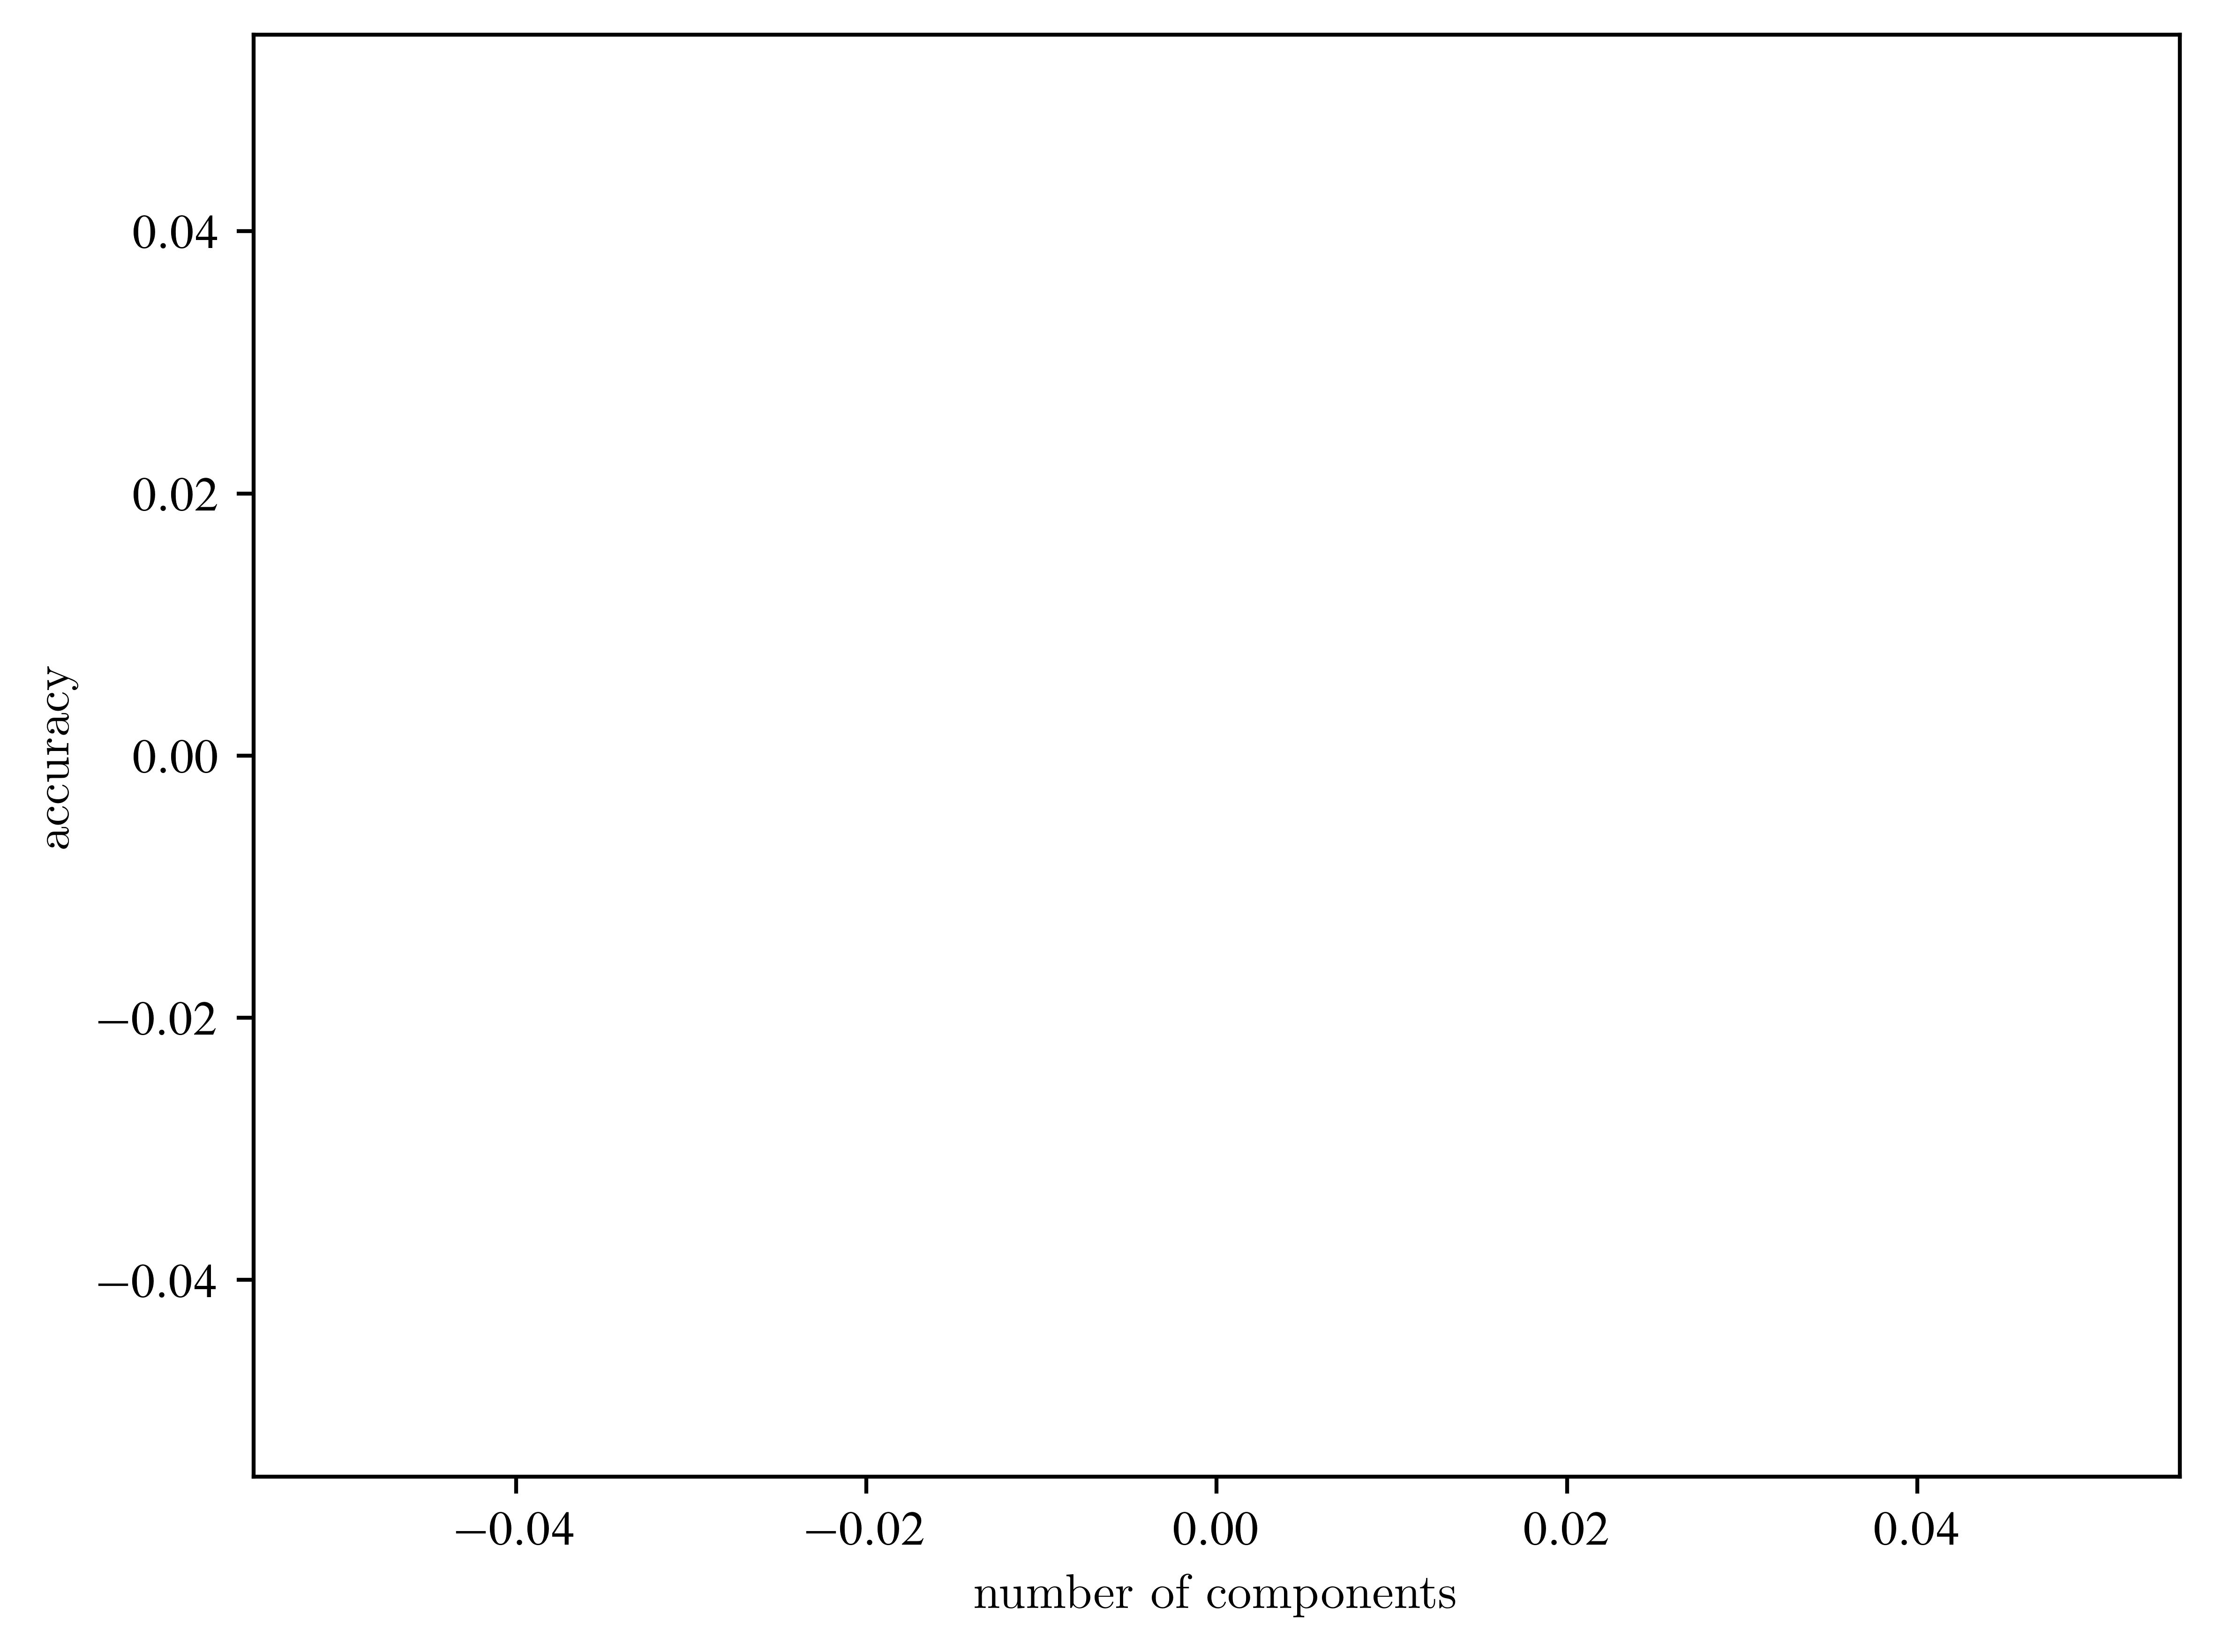

In [22]:
accuracies = []

plt.figure()
plt.plot(accuracies)
plt.xlabel("number of components")
plt.ylabel("accuracy")
plt.show()

EXERCISE: What is influence of division of the dataset?

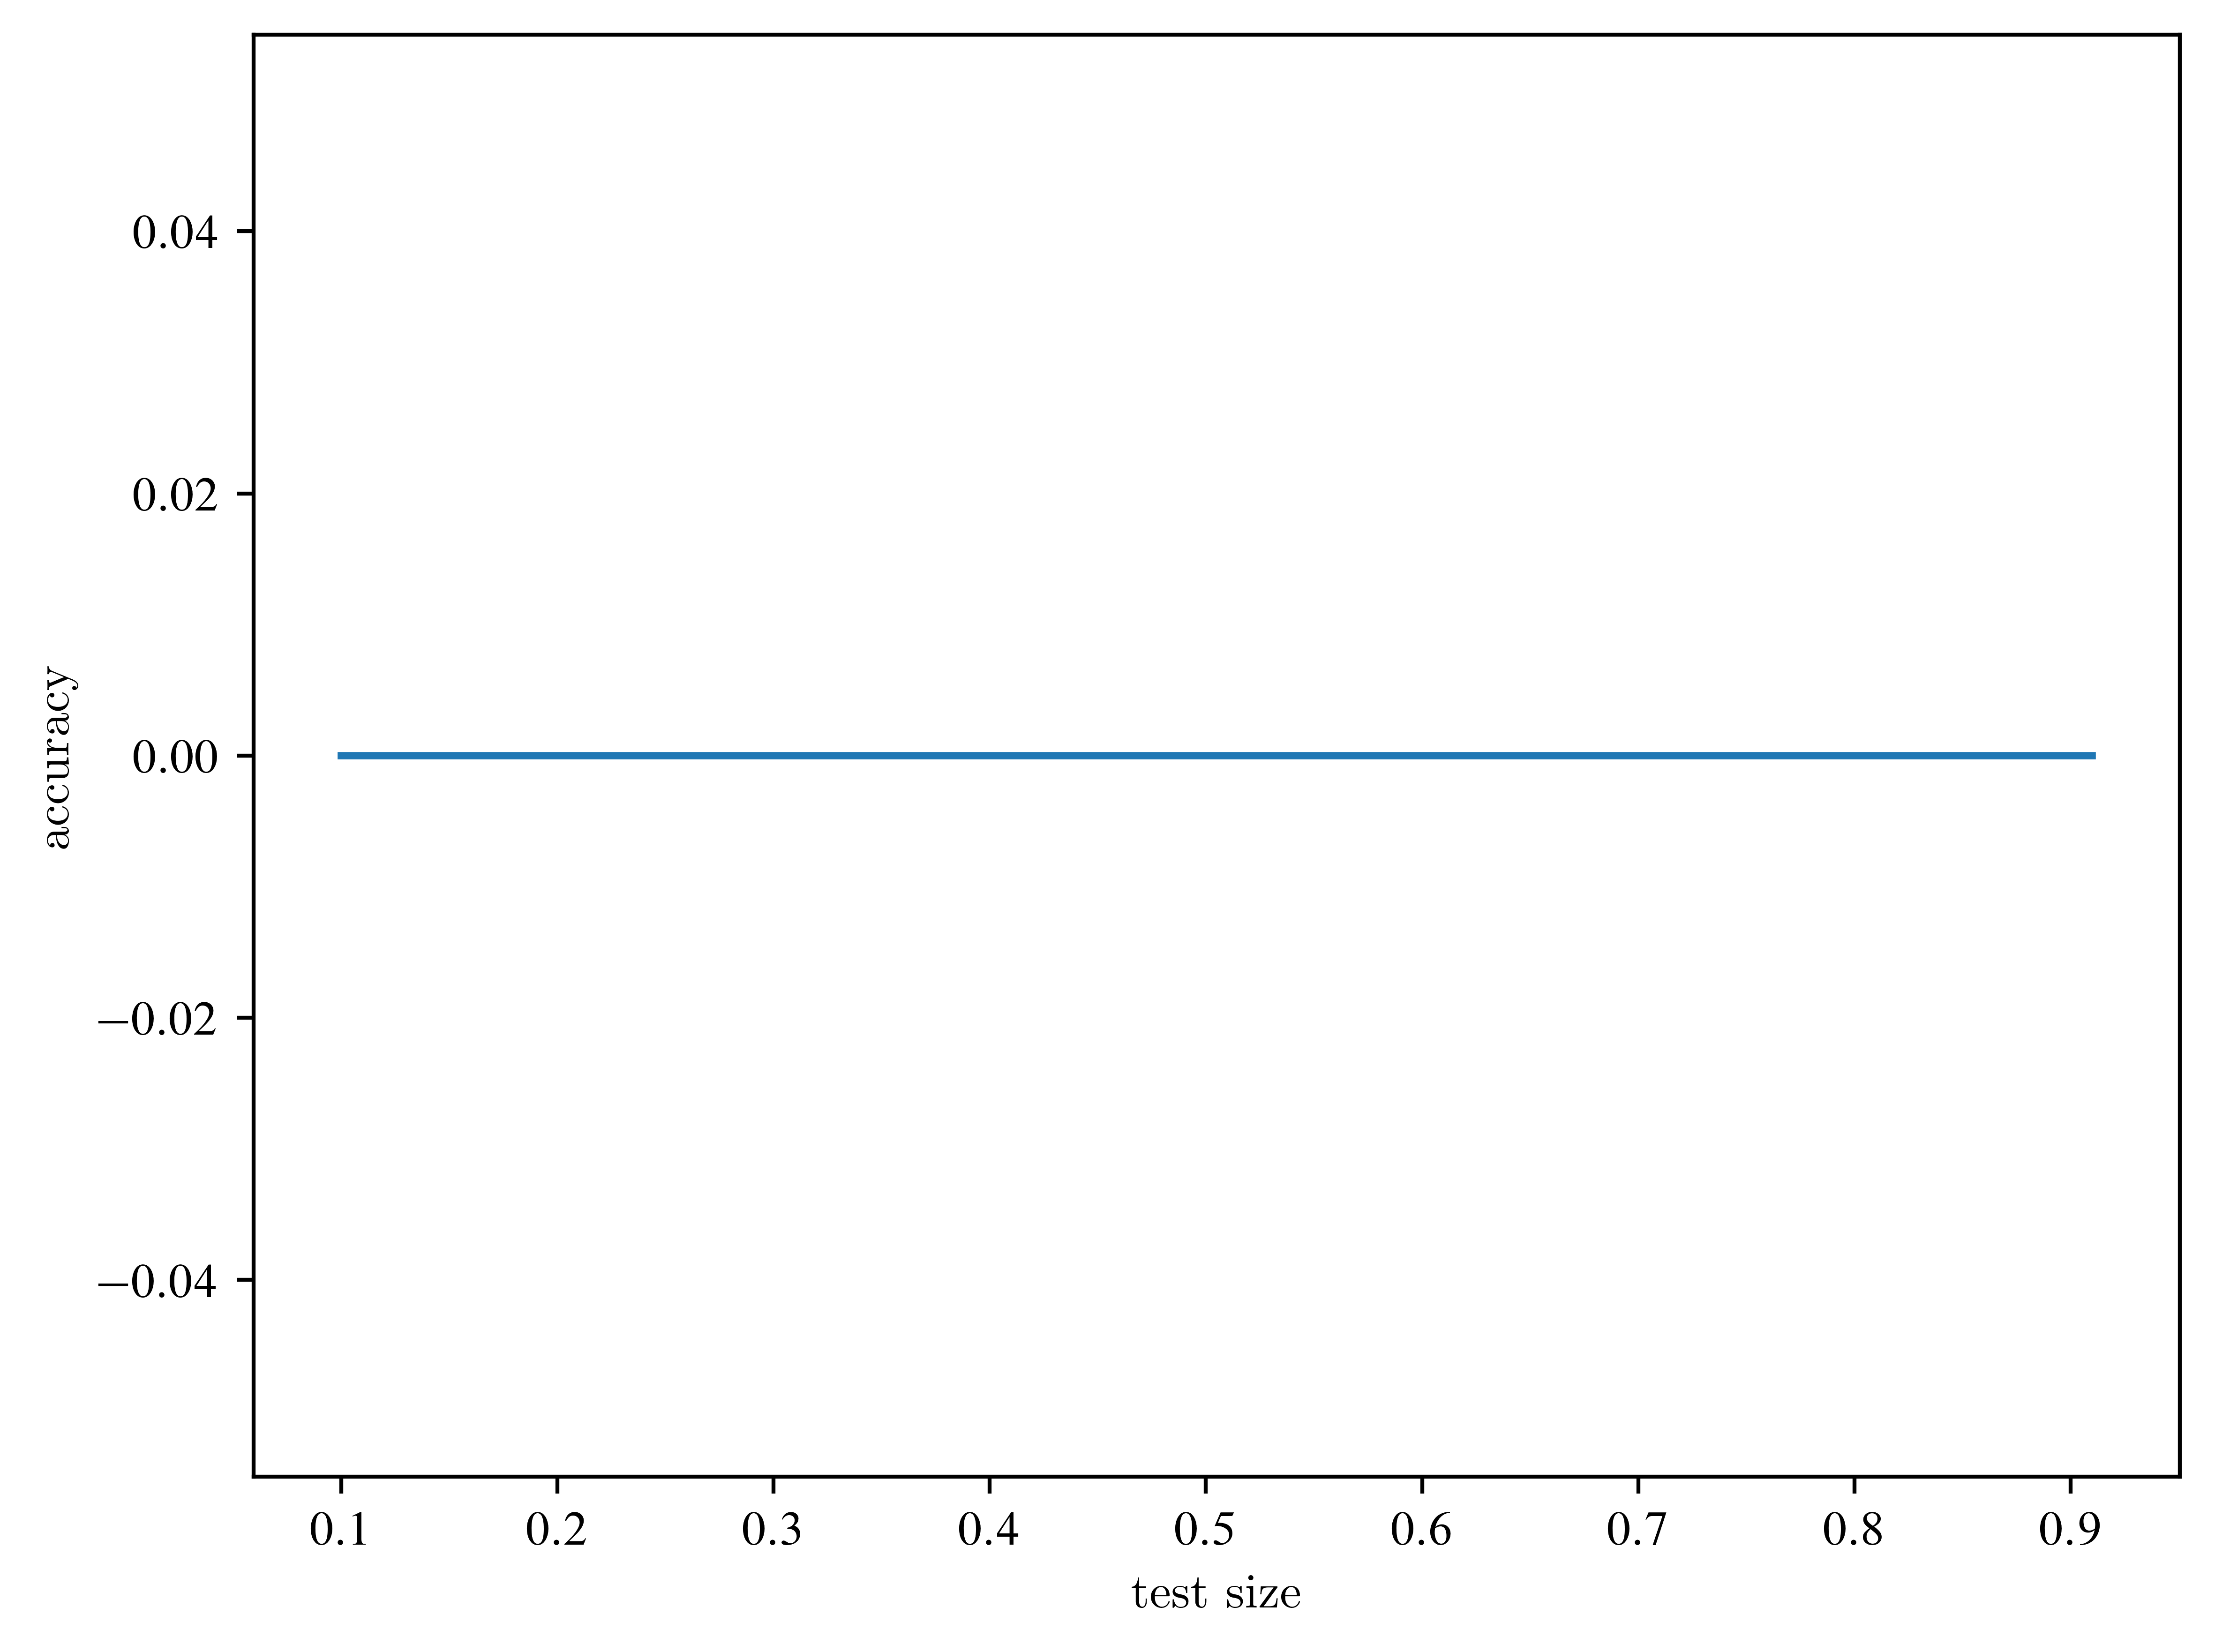

In [23]:
pca = PCA(n_components=10)
data_pca = pca.fit_transform(normalized_df)

n = 10
test_sizes = np.linspace(0.1, 1, n, endpoint=False)

accuracies = np.zeros_like(test_sizes)


plt.figure()
plt.plot(test_sizes, accuracies)
plt.xlabel("test size")
plt.ylabel("accuracy")
plt.show()

Look at the axes? Is the effect relevant?